<h1>📚 Students Performance Dataset 📚</h1><br>
<p>
    <a href="https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data">Link on Kaggle</a><br>
</p>

About Dataset

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.<br>

<u>Table of Contents</u>

    Student Information

    Student ID
    Demographic Details
    Study Habits

    Parental Involvement
    Extracurricular Activities
    Academic Performance
    Target Variable: Grade Class

<u>Student Information</u>

    StudentID: A unique identifier assigned to each student (1001 to 3392).

<u>Demographic Details</u>

    Age: The age of the students ranges from 15 to 18 years.
    Gender: Gender of the students, where 0 represents Male and 1 represents Female.
    Ethnicity: The ethnicity of the students, coded as follows:
    0: Caucasian
    1: African American
    2: Asian
    3: Other
    ParentalEducation: The education level of the parents, coded as follows:
    0: None
    1: High School
    2: Some College
    3: Bachelor's
    4: Higher

<u>Study Habits</u>

    StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
    Absences: Number of absences during the school year, ranging from 0 to 30.
    Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

<u>Parental Involvement</u>

    ParentalSupport: The level of parental support, coded as follows:
    0: None
    1: Low
    2: Moderate
    3: High
    4: Very High

<u>Extracurricular Activities</u>

    Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
    Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
    Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
    Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

<u>Academic Performance</u>

    GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

<u>Target Variable: Grade Class</u>

    GradeClass: Classification of students' grades based on GPA:
    0: 'A' (GPA >= 3.5)
    1: 'B' (3.0 <= GPA < 3.5)
    2: 'C' (2.5 <= GPA < 3.0)
    3: 'D' (2.0 <= GPA < 2.5)
    4: 'F' (GPA < 2.0)

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [69]:
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns
# for QQ plots
import statsmodels.api as sm

# machine learning
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

In [3]:
data = pd.read_csv('Student_performance_data _.csv')
target = data.loc[:, ['GradeClass', 'GPA']]
data.drop(['GradeClass', 'StudentID', 'GPA'], axis=1, inplace=True)

In [4]:
data.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# check on missing values
data.isnull().any().any()

False

✅Let's check our target.

In [6]:
plt.style.use('ggplot')

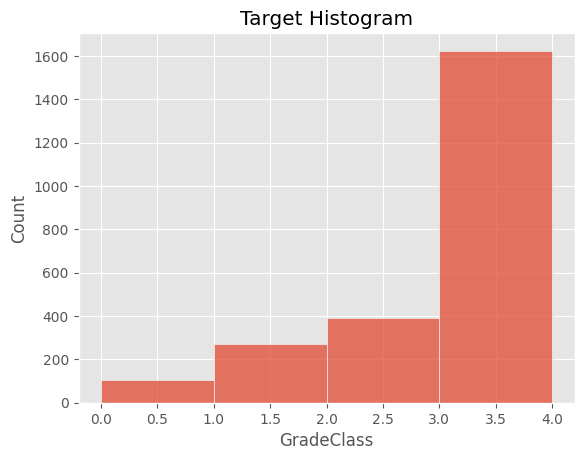

In [7]:
sns.histplot(target['GradeClass'], bins=np.unique(target['GradeClass']))
plt.title('Target Histogram')
plt.show()

✅The target distribution may be exponential if we arrange our data in this way:<br>
<ul>
    <li>5: 'A' (GPA >= 3.5)</li>
    <li>4: 'B' (3.0 <= GPA < 3.5)</li>
    <li>3: 'C' (2.5 <= GPA < 3.0)</li>
    <li>2: 'D' (2.0 <= GPA < 2.5)</li>
    <li>1: 'F' (GPA < 2.0)</li>
</ul>
Let's check this using the chi-square test!

In [8]:
data_series = np.histogram(target, bins=np.unique(target['GradeClass']))
interval_series = pd.DataFrame(data=data_series[0][::-1].reshape(1, 4), columns=['[1-2)', '[2-3)', '[3-4)', '[4-5)'])
interval_series

,[1-2),[2-3),[3-4),[4-5)
0,1946,1188,1075,575


✅First, we need to determine the value of the lambda parameter. Let's do this using the method of
<a href="https://en.wikipedia.org/wiki/Method_of_moments_(statistics)">moments</a>!

In [9]:
param_a = np.round(np.dot([1.5, 2.5, 3.5, 4.5], [1625, 391, 269, 107]) / target['GradeClass'].shape[0], 3)
param_a

2.023

✅Let's find the theoretical frequencies of hitting the intervals.

In [10]:
dist = sc.stats.expon(param_a)
theor_freq = []
intervals = [
    (-np.inf, 2), (2, 3), (3, 4), (4, np.inf)
]

for interval in intervals:
    f = int(len(target) * (dist.cdf(interval[1]) - dist.cdf(interval[0])))
    theor_freq.append(f)
theor_freq = np.array(theor_freq) + 1
theor_freq

array([   1, 1492,  570,  332])

✅Calc chi square criterion!<br>
Critical value - $\chi^2_{0.5; 3}=7.8$

In [11]:
chi_obs = ((data_series[0][::-1] - theor_freq) ** 2) / theor_freq
chi_obs.sum()

3783712.2117332034

✅Well, it is't exponential distribution.

✅Another interesting statistical hypothesis in my opinion would be to check the equality of the average score of students with various extracurricular activities.<br>
Let's perform a simple ANOVA on this data!<br>
And first, of course, we need to check our data and group it.

In [12]:
# We will use the GPA as a target value in this instance, as it would be more representative.
extra_target = target['GPA'].iloc[data[data['Extracurricular'] == 1].index] # gr_1
sport_target = target['GPA'].iloc[data[data['Sports'] == 1].index] # gr_2
music_target = target['GPA'].iloc[data[data['Music'] == 1].index] # gr_3
volun_target = target['GPA'].iloc[data[data['Volunteering'] == 1].index] # gr_4

In [13]:
extra_target.shape, sport_target.shape, music_target.shape, volun_target.shape

((917,), (726,), (471,), (376,))

✅Form a hypothesis:<br>
$H_0: E(gr_1) = E(gr_2) = E(gr_3) = E(gr_4)$<br>
$H_1:$ at least one $E(gr_i)$ is different

❗Let's check our data for normality!<br>
P.S.<br>
We have a fairly large sample size, and according to the Central Limit Theorem, the average of all sample averages will tend towards a normal distribution.<br>
Therefore, it is not necessary for our features to be normally distributed.❗

✅Use QQ plots!

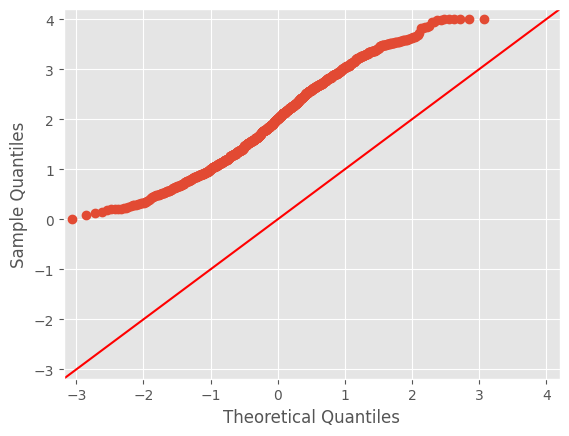

In [14]:
qq_plot_extra = sm.qqplot(extra_target, line='45')
plt.show()

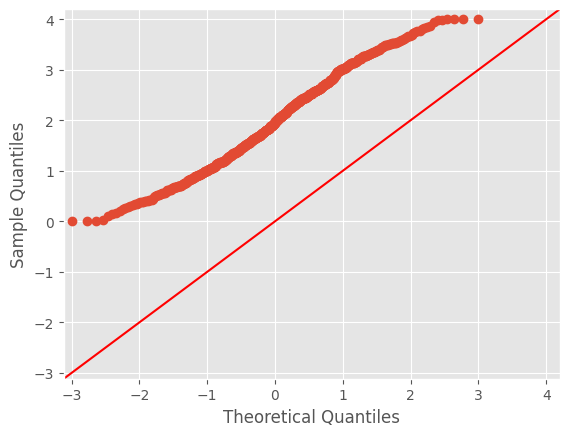

In [15]:
qq_plot_sport = sm.qqplot(sport_target, line='45')
plt.show()

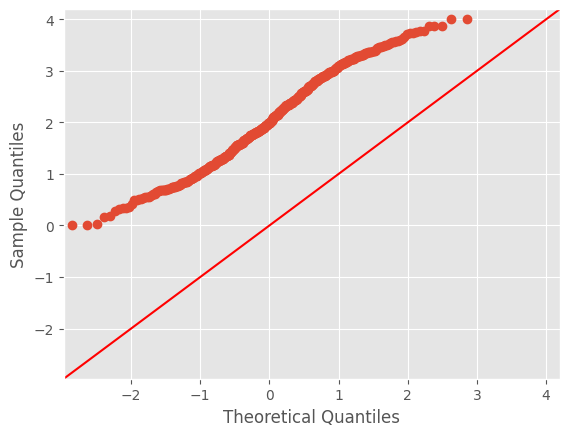

In [16]:
qq_plot_music = sm.qqplot(music_target, line='45')
plt.show()

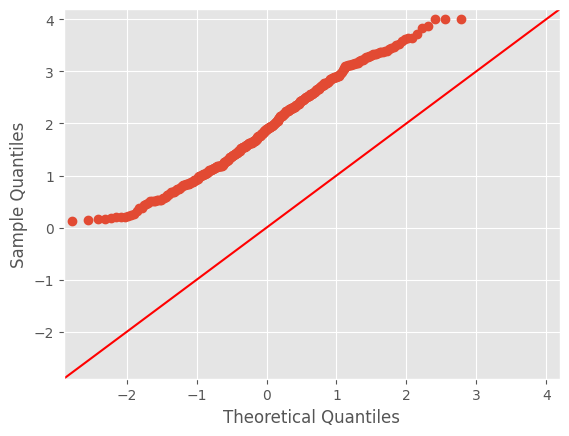

In [17]:
qq_plot_volun = sm.qqplot(volun_target, line='45')
plt.show()

✅Well, It's ain't normal distributions🥲.

✅Come back to ANOVA.

Find variance between groups:<br>
$MS_g=\frac{\sum(\bar{X_i} - \bar{X_{Global}})^{2}}{k-1}\cdot n$<br>
$\bar{X_i}$ - $E(gr_i)$<br>
$\bar{X_{Global}}$ - $E$ of all Sample<br>
$k-1$ - degree of freedom, where k - quantity of groups<br>
$n$ - sample volume.

In [18]:
global_mean = target['GPA'].mean()
msg = sum(([extra_target.mean(), sport_target.mean(), music_target.mean(), volun_target.mean()] - global_mean) ** 2)
msg /= 3 * target['GPA'].shape[0]
msg

5.121408589553676e-06

And find variance in groups:<br>
$MS_w=\frac{\sum_{i=1}^{k} varince_i}{k}$<br>
k - quantity of groups<br>

In [19]:
msw = sum(map(np.var, [extra_target, sport_target, music_target, volun_target])) / 3
msw

1.0991421173878027

✅Calc F-stat:<br>
$F=\frac{MS_g}{MS_w}$

In [20]:
F = msg / msw
F

4.6594598719636955e-06

✅ F is less that critical point - 9,28, so we can't reject $H_0$.

<h3>🔍Let's do some more EDA!</h3>

✅Let's take a look at our data and see how it is distributed across the main components using PCA.

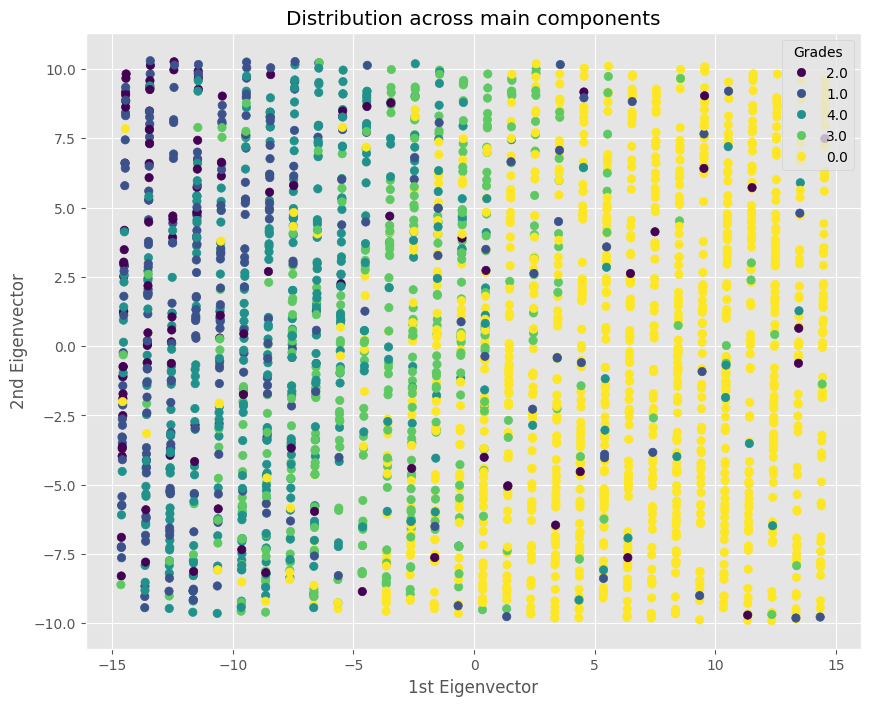

In [21]:
data_pca = PCA(n_components=2).fit_transform(data)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target['GradeClass'])

plt.legend(scatter.legend_elements()[0], target['GradeClass'].unique(), loc='upper right', title='Grades')
plt.title('Distribution across main components')
plt.xlabel('1st Eigenvector')
plt.ylabel('2nd Eigenvector')
plt.show()

✅See also on Grade Distribution via age.

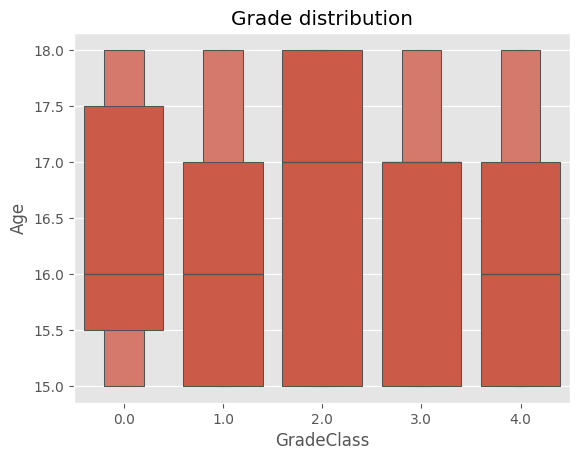

In [22]:
graph_data = pd.concat((target, data), axis=1)
sns.boxenplot(data=graph_data, x='GradeClass', y='Age')

plt.title('Grade distribution')
plt.show()

✅It seems that age has a minimal impact on the target group.

✅Finally look on correlation matrix.

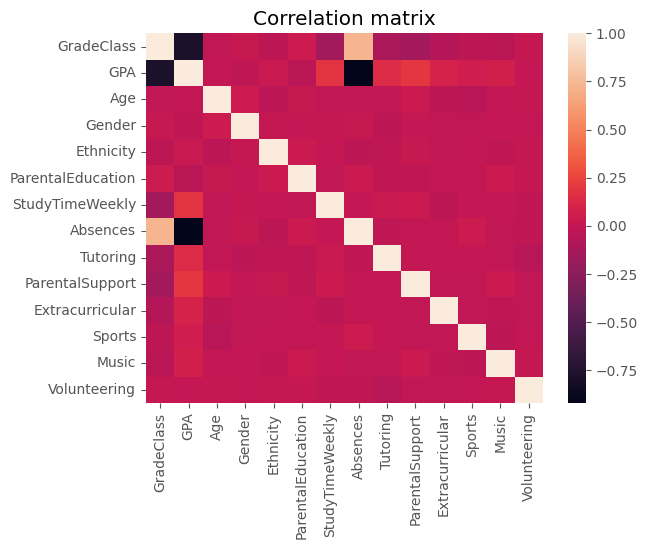

In [23]:
sns.heatmap(graph_data.corr())

plt.title('Correlation matrix')
plt.show()

In [24]:
graph_data.corr()['GradeClass']

GradeClass           1.000000
GPA                 -0.782835
Age                 -0.006250
Gender               0.022998
Ethnicity           -0.023326
ParentalEducation    0.041031
StudyTimeWeekly     -0.134131
Absences             0.728633
Tutoring            -0.111695
ParentalSupport     -0.136823
Extracurricular     -0.069733
Sports              -0.026654
Music               -0.036065
Volunteering         0.013156
Name: GradeClass, dtype: float64

✅It seems that absence has a significant impact on the desired outcomes.

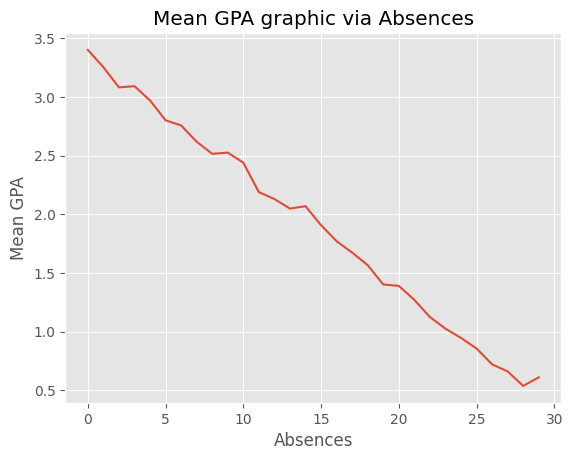

In [25]:
x_val = graph_data['Absences'].unique()
y_val = list(map(lambda x: graph_data[graph_data['Absences'] == x]['GPA'].mean(), x_val))

sns.lineplot(x=x_val, y=y_val)

plt.title('Mean GPA graphic via Absences')
plt.xlabel('Absences')
plt.ylabel('Mean GPA')
plt.show()

<h3>☝️Prepare data for learning</h3>

In [26]:
X = data.copy()
y = target['GPA']
y_clf = target['GradeClass']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_clf, random_state=42, test_size=0.3)

In [27]:
# to convert regression into marks
def convertIntoMark(x: float) -> float:
    if x < 2.0: return 4
    if 2.0 <= x < 2.5: return 3
    if 2.5 <= x < 3.0: return 2
    if 3.0 <= x < 3.5: return 1
    return 0

<h3>🤖Training models</h3>

✅See how base different models handle regression task.

✅Start with trees.

In [30]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
t_pred = tree.predict(X_test)

In [31]:
print('R2 score train: ', r2_score(y_train, tree.predict(X_train)))
print('R2 score test: ', r2_score(y_test, t_pred))

R2 score train:  1.0
R2 score test:  0.8553378894942674


In [32]:
pred_clf = t_pred.copy()

In [33]:
pred_clf = list(map(convertIntoMark, pred_clf))

In [34]:
print(classification_report(y_test_clf, np.array(pred_clf)))

              precision    recall  f1-score   support

         0.0       0.42      0.24      0.31        33
         1.0       0.52      0.55      0.54        80
         2.0       0.49      0.45      0.47       121
         3.0       0.51      0.47      0.49       127
         4.0       0.86      0.93      0.89       357

    accuracy                           0.69       718
   macro avg       0.56      0.53      0.54       718
weighted avg       0.68      0.69      0.68       718



✅Continue with RandomForest

In [35]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
f_pred = forest.predict(X_test)

In [36]:
print('R2 score train: ', r2_score(y_train, forest.predict(X_train)))
print('R2 score test: ', r2_score(y_test, f_pred))

R2 score train:  0.9898147956613597
R2 score test:  0.9309439715085632


In [37]:
forest_eval = cross_val_score(estimator=forest, X=X_train, y=y_train, scoring='r2', cv=10)
abs(forest_eval.mean())

0.9246750596645945

In [38]:
f_pred_clf = f_pred.copy()

In [39]:
f_pred_clf = list(map(convertIntoMark, f_pred_clf))

In [40]:
print(classification_report(y_test_clf, np.array(f_pred_clf)))

              precision    recall  f1-score   support

         0.0       0.89      0.24      0.38        33
         1.0       0.61      0.66      0.63        80
         2.0       0.57      0.57      0.57       121
         3.0       0.57      0.54      0.55       127
         4.0       0.87      0.93      0.90       357

    accuracy                           0.74       718
   macro avg       0.70      0.59      0.61       718
weighted avg       0.74      0.74      0.73       718



✅Also try Bagging on trees and linear regression

In [41]:
bagging_tree = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42))
bagging_tree.fit(X_train, y_train)
bagT_pred = bagging_tree.predict(X_test)

In [42]:
print('R2 score train: ', r2_score(y_train, bagging_tree.predict(X_train)))
print('R2 score test: ', r2_score(y_test, bagT_pred))

R2 score train:  0.9846677594379254
R2 score test:  0.9227797481313597


In [43]:
bagT_eval = cross_val_score(estimator=bagging_tree, X=X_train, y=y_train, scoring='r2', cv=10)
abs(bagT_eval.mean())

0.9184865351231923

In [44]:
bagT_pred_clf = bagT_pred.copy()

In [45]:
bagT_pred_clf = list(map(convertIntoMark, bagT_pred_clf))

In [46]:
print(classification_report(y_test_clf, np.array(bagT_pred_clf)))

              precision    recall  f1-score   support

         0.0       0.73      0.24      0.36        33
         1.0       0.56      0.60      0.58        80
         2.0       0.58      0.61      0.60       121
         3.0       0.57      0.50      0.53       127
         4.0       0.86      0.93      0.89       357

    accuracy                           0.73       718
   macro avg       0.66      0.58      0.59       718
weighted avg       0.72      0.73      0.72       718



In [73]:
bagging_lin = BaggingRegressor(estimator=LinearRegression(), random_state=42)
bagging_lin.fit(X_train, np.array(y_train))
bagL_pred = bagging_lin.predict(X_test)

In [74]:
print('R2 score train: ', r2_score(y_train, bagging_lin.predict(X_train)))
print('R2 score test: ', r2_score(y_test, bagL_pred))

R2 score train:  0.9531410615218763
R2 score test:  0.9554810292211757


In [75]:
bagL_eval = cross_val_score(estimator=bagging_lin, X=X_train, y=y_train, scoring='r2', cv=10)
abs(bagL_eval.mean())

0.9515021331392143

In [76]:
bagL_pred_clf = bagL_pred.copy()

In [77]:
bagL_pred_clf = list(map(convertIntoMark, bagL_pred_clf))

In [78]:
print(classification_report(y_test_clf, np.array(bagL_pred_clf)))

              precision    recall  f1-score   support

         0.0       0.62      0.39      0.48        33
         1.0       0.61      0.61      0.61        80
         2.0       0.68      0.63      0.65       121
         3.0       0.58      0.61      0.59       127
         4.0       0.88      0.92      0.90       357

    accuracy                           0.76       718
   macro avg       0.67      0.63      0.65       718
weighted avg       0.75      0.76      0.75       718



✅ And finish with Gradient Boosting

In [54]:
bst = XGBRegressor()
bst.fit(X_train, y_train)
bst_pred = bst.predict(X_test)

In [55]:
print('R2 score train: ', r2_score(y_train, bst.predict(X_train)))
print('R2 score test: ', r2_score(y_test, bst_pred))

R2 score train:  0.9974589174439253
R2 score test:  0.9330525918856429


In [56]:
bst_pred_clf = bst_pred.copy()

In [57]:
bst_pred_clf = list(map(convertIntoMark, bst_pred_clf))

In [58]:
print(classification_report(y_test_clf, np.array(bst_pred_clf)))

              precision    recall  f1-score   support

         0.0       0.44      0.21      0.29        33
         1.0       0.52      0.50      0.51        80
         2.0       0.55      0.56      0.56       121
         3.0       0.55      0.56      0.56       127
         4.0       0.88      0.92      0.90       357

    accuracy                           0.72       718
   macro avg       0.59      0.55      0.56       718
weighted avg       0.71      0.72      0.71       718



✅Well, bagging linear models seems to be a better approach for regression tasks.

✅Let's take a look at the distribution of GPA based on the main features in the linear regression model.

In [59]:
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)
feature_weights = pd.DataFrame(data=abs(linearReg.coef_), index=data.columns, columns=['Weight'])
feature_weights.sort_values(by=['Weight'], ascending=False)

,Weight
Absences,0.841994
ParentalSupport,0.166978
StudyTimeWeekly,0.164614
Tutoring,0.118392
Extracurricular,0.092515
Sports,0.080671
Music,0.060971
Age,0.008020
Gender,0.004293
Ethnicity,0.003983


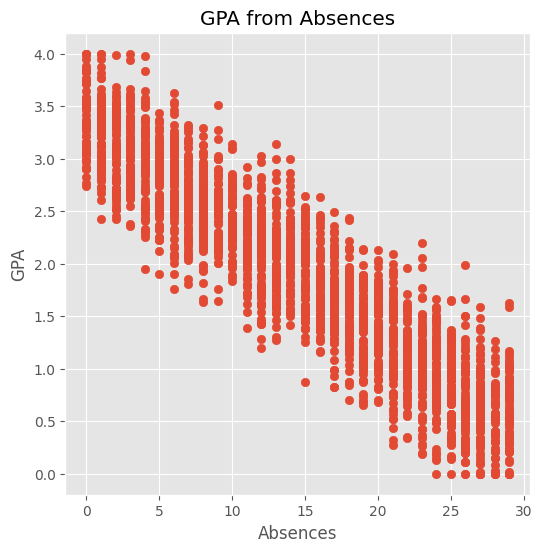

In [131]:
plt.figure(figsize=(6, 6))
scatter = plt.scatter(data['Absences'], target['GPA'])
x = np.arange(0, 31)

plt.title('GPA from Absences')
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.show()

✅We see that many models are quite good at solving regression problem. This means we need to find a way to better convert their predictions into grades. First, we need to consider RMSE - this represents how much our predictions differ from the target.

In [126]:
index_0 = y_clf[y_clf == 0.0].index
index_1 = y_clf[y_clf == 1.0].index
index_1 = y_clf[y_clf == 2.0].index
index_1 = y_clf[y_clf == 3.0].index
index_1 = y_clf[y_clf == 4.0].index
print('RMSE for class 0: ', root_mean_squared_error(y.iloc[index_0], bagging_lin.predict(X_scaled[index_0])))
print('RMSE for class 1: ', root_mean_squared_error(y.iloc[index_1], bagging_lin.predict(X_scaled[index_1])))
print('RMSE for class 2: ', root_mean_squared_error(y.iloc[index_2], bagging_lin.predict(X_scaled[index_2])))
print('RMSE for class 3: ', root_mean_squared_error(y.iloc[index_3], bagging_lin.predict(X_scaled[index_3])))
print('RMSE for class 4: ', root_mean_squared_error(y.iloc[index_4], bagging_lin.predict(X_scaled[index_4])))

RMSE for class 0:  0.19944567835278268
RMSE for class 1:  0.20278760427484158
RMSE for class 2:  0.186531165503422
RMSE for class 3:  0.18788129750839147
RMSE for class 4:  0.20278760427484158


✅It means that if we want to convert model predictions into classes, we have to consider the error rate equal in average 0.2.